In [1]:
import mylastool

container = mylastool.get_container()
lasfiles = mylastool.list_files(container, suffix=".LAS")
mylastool.print_directory(lasfiles)

             1184900 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS
             1720411 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_2.LAS
             1965200 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_3.LAS
             1904013 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_4.LAS
             3342200 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_5.LAS
             1139000 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_6.LAS
              710600 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_7.LAS
              679490 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_8.LAS
             1139000 31_5-7 Eos/05.LWD_Log_data/WL_RAW_BHPR-GR-MECH_TIME_MWD_9.LAS
              585275 31_5-7 Eos/05.LWD_Log_data/WL_RAW_GR-MECH_TIME_MWD_1.LAS
             2877827 31_5-7 Eos/07.Borehole_Seismic/TZV_DEPTH_MD_COMPUTED_2020-01-17_1.LAS
              108614 31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_1.LA

In [3]:
filename = "31_5-7 Eos/07.Borehole_Seismic/TZV_TIME_SYNSEIS_2020-01-17_2.LAS"
lines = mylastool.read_lasfile(container, filename)
print(len(lines))
print(*mylastool.get_header_section(lines), sep='\n')


759
~Version Information
VERS  .          2.0                              :CWLS Log Ascii Standard - Version 2.0
WRAP  .          NO                               :One line per depth step
~Well Information Block
#MNEM.UNIT       Data Type                        Information
#---------       ---------                        -------------------------------
STRT  .S         1.84600                          :START DEPTH
STOP  .S         2.56700                          :STOP DEPTH
STEP  .S         0.00100                          :INCREMENT
NULL  .          -999.25                          :NULL DATA VALUE
COMP  .          Equinor                          :COMPANY
WELL  .          31/5-7                           :WELL
FLD   .          Eos                              :FIELD
LOC   .                                           :LOCATION
PROV  .                                           :PROVINCE
STAT  .                                           :STATE
CNTY  .                                  

In [4]:
values = []
for row in mylastool.get_data_section(lines):
    values.append([float(col) for col in row.split()])
curves = list(zip(*values))
#print(curves)

curve_mnemonics = mylastool.get_curve_mnemonics(lines)
print(curve_mnemonics)
for mnom, curve in zip(curve_mnemonics, curves):
    curve_values = [value for value in curve if value != -999.25]
    print(f'{mnom:<10} min={min(curve_values):<8} max={max(curve_values):<8}')
    


['Time', 'SREF_45Hz', 'SREF_35Hz', 'SREF_25Hz', 'SREF_20Hz']
Time       min=1.846    max=2.567   
SREF_45Hz  min=-0.19864 max=0.21486 
SREF_35Hz  min=-0.20577 max=0.20651 
SREF_25Hz  min=-0.19672 max=0.1975  
SREF_20Hz  min=-0.18145 max=0.17892 


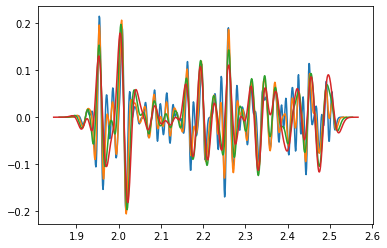

In [5]:
import numpy as np
curves = np.array(values).T
curves = np.where(curves==-999.25, np.nan, curves)

import matplotlib.pyplot as plt
plt.plot(curves[0], curves[1])
plt.plot(curves[0], curves[2])
plt.plot(curves[0], curves[3])
plt.plot(curves[0], curves[4])
